In [1]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [2]:
#load Dataset and classify as features and label
phishingData = pd.read_csv('/content/phishing.txt')
X = phishingData.iloc[:,:-1].values
y = phishingData.iloc[:,30].values

In [3]:
phishingData.head()

,-1,1,1.1,1.2,-1.1,-1.2,-1.3,-1.4,-1.5,1.3,...,1.9,1.10,-1.11,-1.12,-1.13,-1.14,1.11,1.12,-1.15,-1.16
0,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1


In [4]:
phishingData.shape

(11054, 31)

In [5]:
phishingData.isnull().sum()

-1       0
1        0
1.1      0
1.2      0
-1.1     0
-1.2     0
-1.3     0
-1.4     0
-1.5     0
1.3      0
1.4      0
-1.6     0
1.5      0
-1.7     0
1.6      0
-1.8     0
-1.9     0
-1.10    0
0        0
1.7      0
1.8      0
1.9      0
1.10     0
-1.11    0
-1.12    0
-1.13    0
-1.14    0
1.11     0
1.12     0
-1.15    0
-1.16    0
dtype: int64

In [6]:
phishingData.columns = ['having_IP_Address','URL_length','Shortining_Service','having_At_Symbol',
              'double_slash_redirecting','Prefix_suffix','having_Sub_Domain','SSLfinal_State','Domain_registration_length',
               'Favion','Port','HTTPS_token','Request_URL','URL_of_Anchor','Links_in_tags','SFH',
               'Submitting_to_email','Abnormal_URL','Redirect','on_movesover','RightClick','PopUpwindow','IFrame',
                'age_of_domain','DNSRecord','web_traffic','Page_Rank','Google_Index',
                'Links_pointing_to_page','Statistical_Report','Result']

In [7]:
phishingData.head()

,having_IP_Address,URL_length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_suffix,having_Sub_Domain,SSLfinal_State,Domain_registration_length,Favion,...,PopUpwindow,IFrame,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_Report,Result
0,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1


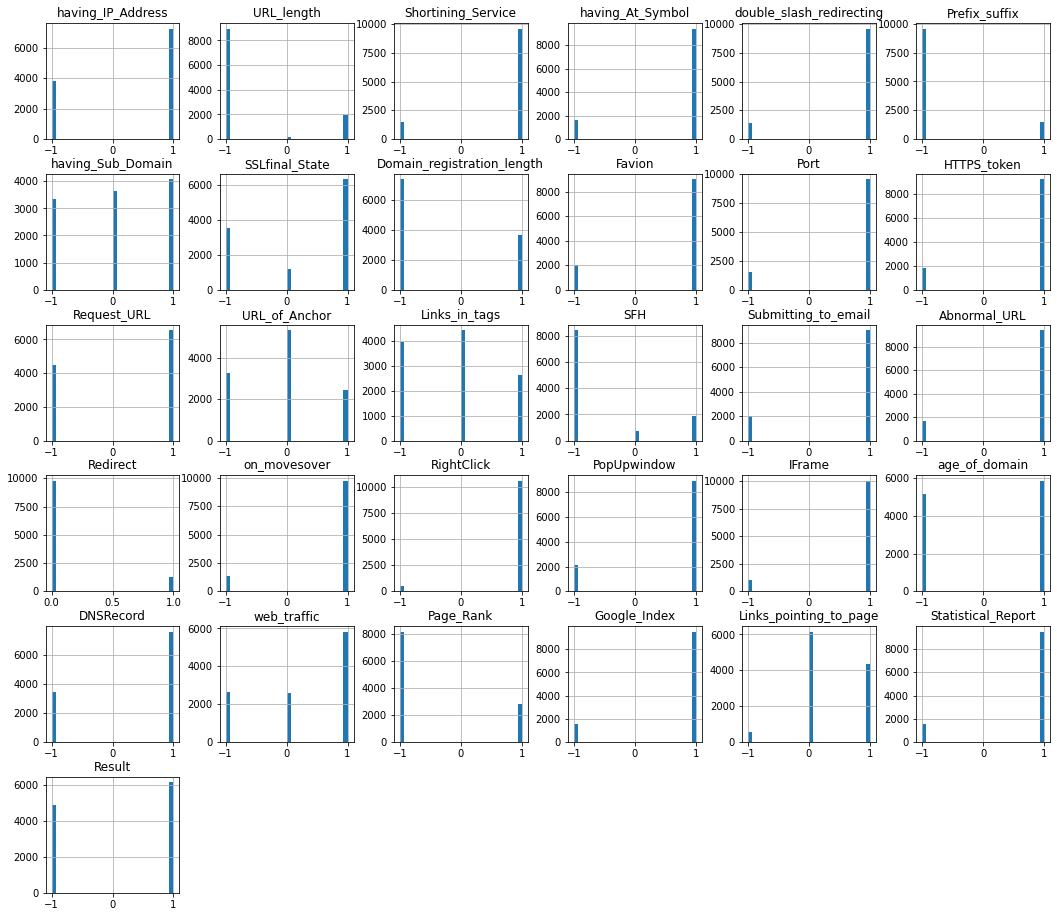

In [8]:
phishingData.hist(bins = 30,figsize = (18,16))
plt.show()

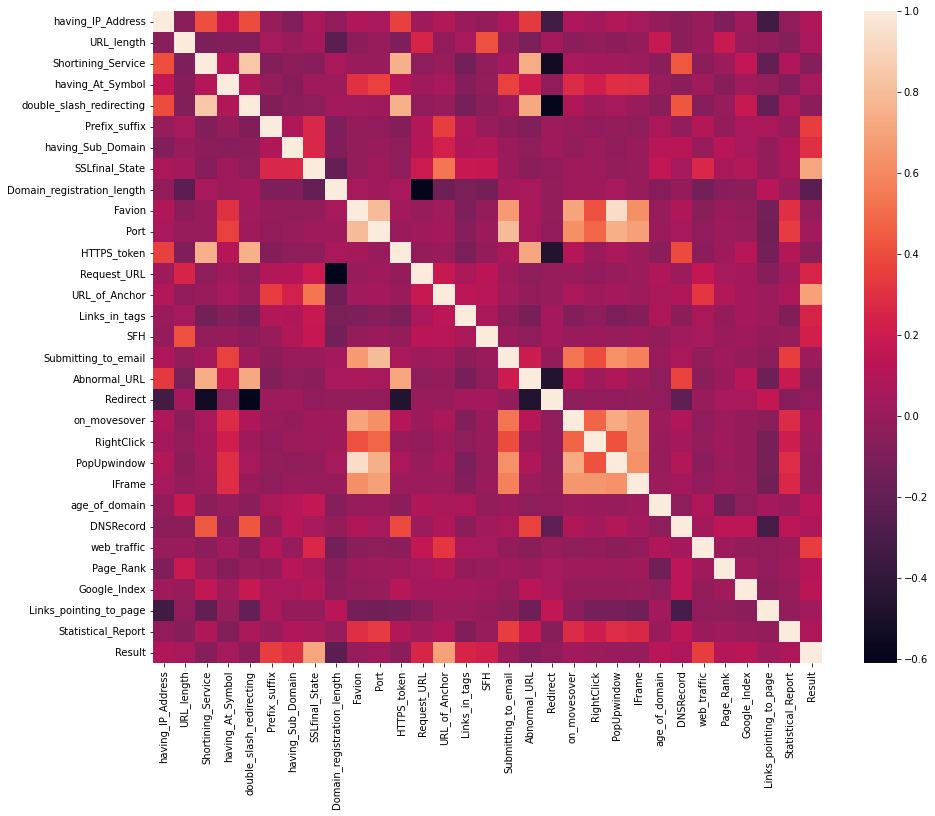

In [9]:
plt.figure(figsize=(15,12))
sns.heatmap(phishingData.corr())
plt.show()

In [10]:
#split features and label into training and testing data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=4)

In [11]:
#perform feature scaling
scalar = StandardScaler()
X_train = scalar.fit_transform (X_train)
X_test = scalar.fit_transform (X_test) 

In [12]:
#Logistic Regression Classifier 
LRclassifier = LogisticRegression(C=100,random_state=0)
LRclassifier.fit(X_train,y_train)
LRpredict = LRclassifier.predict(X_test)

In [13]:
#LRC training score
LRclassifier.score(X_train,y_train)

0.9298177588212485

In [14]:
#LRC test score
LRclassifier.score(X_test,y_test)

0.9267410310521556

In [15]:
#confusion matrix for printing count of misclassified samples in the test data prediction
confusionMatrixL1 = confusion_matrix(y_test,LRpredict)
confusionMatrixL1

array([[1355,  155],
       [  88, 1719]])

In [16]:
# Random Forest Classifier
Forest = RandomForestClassifier(random_state=0)
Forest.fit(X_train,y_train)
FRCpredict= Forest.predict(X_test)

In [17]:
#RFC training score
Forest.score(X_train,y_train)

0.9908233165309551

In [18]:
#RFC test score
Forest.score(X_test,y_test)

0.9716611395839614

In [19]:
confusionMatrixR1 = confusion_matrix(y_test,FRCpredict)
confusionMatrixR1

array([[1446,   64],
       [  30, 1777]])

In [20]:
xgb = XGBClassifier(random_state=0)
#fit the model
xgb.fit(X_train, y_train)
XGBpredict= xgb.predict(X_test)

In [21]:
#XGBoost training score
xgb.score(X_train,y_train)

0.9510146051441127

In [22]:
#XGBoost test score
xgb.score(X_test,y_test)

0.9517636418450407

In [23]:
confusionMatrixX1 = confusion_matrix(y_test,FRCpredict)
confusionMatrixX1

array([[1446,   64],
       [  30, 1777]])

In [24]:
Tree = DecisionTreeClassifier(random_state=0)
# fit the model 
Tree.fit(X_train, y_train)
DTCpredict= Tree.predict(X_test)

In [25]:
#DTC training score
print(Tree.score(X_train,y_train))

0.9908233165309551


In [26]:
#Tree test score
print(Tree.score(X_test,y_test))

0.964124208622249


In [27]:
confusionMatrixD1 = confusion_matrix(y_test,DTCpredict)
confusionMatrixD1

array([[1439,   71],
       [  48, 1759]])

In [28]:
svc= SVC(random_state=0) 
#fit the model
svc.fit(X_train, y_train)
SVCpredict= svc.predict(X_test)

In [29]:
#SVC training score
print(svc.score(X_train,y_train))

0.9572185601654388


In [30]:
#SVC test score
print(svc.score(X_test,y_test))

0.9508592101296353


In [31]:
confusionMatrixS1 = confusion_matrix(y_test,SVCpredict)
confusionMatrixS1

array([[1402,  108],
       [  55, 1752]])

In [32]:
# classify as features(Prefix_Suffix and URL_of_Anchor) and label with index 5
X = phishingData.iloc[0:5,[6,14]].values
y = phishingData.iloc[0:5,30].values

In [33]:
#split features and label into training ang testing data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=4)

In [34]:
#perform feature scaling
scalar = StandardScaler()
X_train = scalar.fit_transform (X_train)
X_test = scalar.fit_transform (X_test) 

In [35]:
#Logistic Regression Classifier 
LRclassifier1 = LogisticRegression(C=100,random_state=0)
LRclassifier1.fit(X_train,y_train)

LogisticRegression(C=100, random_state=0)

In [36]:
LRpredict1 = LRclassifier1.predict(X_test)

In [37]:
#LRC training score
LRclassifier1.score(X_train,y_train)

1.0

In [38]:
#LRC test score
LRclassifier1.score(X_test,y_test)

1.0

In [39]:
#confusion matrix for printing count of misclassified samples in the test data prediction
LRconfusionMatrixL2 = confusion_matrix(y_test,LRpredict1)
LRconfusionMatrixL2

array([[1, 0],
       [0, 1]])

[[1.69212931e-11 1.70416335e-11 1.71628297e-11 ... 1.98095309e-08
  1.99504118e-08 2.00922946e-08]
 [1.75868947e-11 1.77119688e-11 1.78379323e-11 ... 2.05887418e-08
  2.07351643e-08 2.08826281e-08]
 [1.82786780e-11 1.84086718e-11 1.85395901e-11 ... 2.13986032e-08
  2.15507852e-08 2.17040495e-08]
 ...
 [9.99998835e-01 9.99998844e-01 9.99998852e-01 ... 9.99999999e-01
  9.99999999e-01 9.99999999e-01]
 [9.99998879e-01 9.99998887e-01 9.99998895e-01 ... 9.99999999e-01
  9.99999999e-01 9.99999999e-01]
 [9.99998922e-01 9.99998929e-01 9.99998937e-01 ... 9.99999999e-01
  9.99999999e-01 9.99999999e-01]]


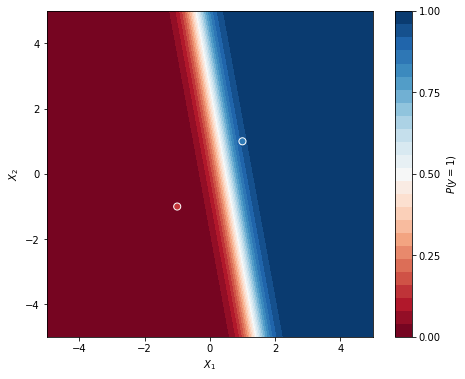

In [40]:
#visualize the Test set
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = LRclassifier1.predict_proba(grid)[:, 1].reshape(xx.shape)

print(probs)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
 vmin=0, vmax=1)

ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.scatter(X_test[:, 0], X_test[:, 1],c = (y_test == 1 ), s=50,
 cmap="RdBu", vmin=-.2, vmax=1.2,
 edgecolor="white", linewidth=1)

ax.set(aspect="equal",
 xlim=(-5, 5), ylim=(-5, 5),
 xlabel="$X_1$", ylabel="$X_2$")

plt.show()

In [41]:
RFclassifier1 = RandomForestClassifier(random_state=0)
RFclassifier1.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [42]:
RFpredict1 = RFclassifier1.predict(X_test)

In [43]:
#RFC training score
RFclassifier1.score(X_train,y_train)

1.0

In [44]:
#RFC training score
RFclassifier1.score(X_test,y_test)

1.0

In [45]:
#confusion matrix for printing count of misclassified samples in the test data prediction
confusionMatrixR2 = confusion_matrix(y_test,RFpredict1)
confusionMatrixR2

array([[1, 0],
       [0, 1]])

[[0.1  0.1  0.1  ... 0.19 0.19 0.19]
 [0.1  0.1  0.1  ... 0.19 0.19 0.19]
 [0.1  0.1  0.1  ... 0.19 0.19 0.19]
 ...
 [0.52 0.52 0.52 ... 0.73 0.73 0.73]
 [0.52 0.52 0.52 ... 0.73 0.73 0.73]
 [0.52 0.52 0.52 ... 0.73 0.73 0.73]]


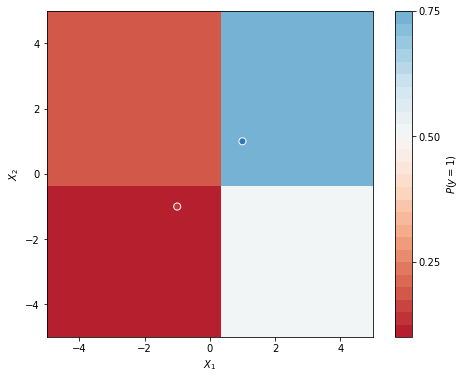

In [46]:
#visualize the Test set
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = RFclassifier1.predict_proba(grid)[:, 1].reshape(xx.shape)

print(probs)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
 vmin=0, vmax=1)

ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.scatter(X_test[:, 0], X_test[:, 1],c = (y_test == 1 ), s=50,
 cmap="RdBu", vmin=-.2, vmax=1.2,
 edgecolor="white", linewidth=1)

ax.set(aspect="equal",
 xlim=(-5, 5), ylim=(-5, 5),
 xlabel="$X_1$", ylabel="$X_2$")

plt.show()

In [47]:
xgb2 = XGBClassifier(random_state=0)
#fit the model
xgb2.fit(X_train, y_train)

XGBClassifier()

In [48]:
XGBpredict1= xgb2.predict(X_test)

In [49]:
#XGBoost training score
xgb2.score(X_train,y_train)

0.6666666666666666

In [50]:
#XGBoost test score
xgb2.score(X_test,y_test)

0.5

In [51]:
confusionMatrixXg1 = confusion_matrix(y_test,XGBpredict1)
confusionMatrixXg1

array([[1, 0],
       [1, 0]])

[[0.3358685 0.3358685 0.3358685 ... 0.3358685 0.3358685 0.3358685]
 [0.3358685 0.3358685 0.3358685 ... 0.3358685 0.3358685 0.3358685]
 [0.3358685 0.3358685 0.3358685 ... 0.3358685 0.3358685 0.3358685]
 ...
 [0.3358685 0.3358685 0.3358685 ... 0.3358685 0.3358685 0.3358685]
 [0.3358685 0.3358685 0.3358685 ... 0.3358685 0.3358685 0.3358685]
 [0.3358685 0.3358685 0.3358685 ... 0.3358685 0.3358685 0.3358685]]


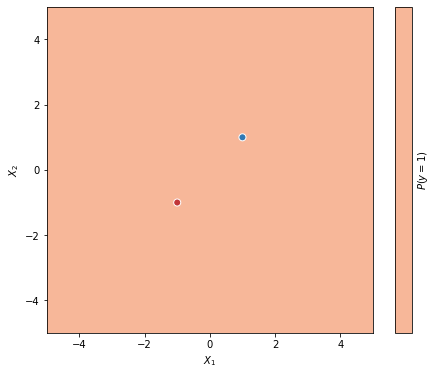

In [52]:
#visualize the Test set
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = xgb2.predict_proba(grid)[:, 1].reshape(xx.shape)

print(probs)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
 vmin=0, vmax=1)

ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.scatter(X_test[:, 0], X_test[:, 1],c = (y_test == 1 ), s=50,
 cmap="RdBu", vmin=-.2, vmax=1.2,
 edgecolor="white", linewidth=1)

ax.set(aspect="equal",
 xlim=(-5, 5), ylim=(-5, 5),
 xlabel="$X_1$", ylabel="$X_2$")

plt.show()

In [53]:
Tree2 = DecisionTreeClassifier(random_state=0)
# fit the model 
Tree2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [54]:
DTCpredict1= Tree2.predict(X_test)

In [55]:
#DTC training score
print(Tree2.score(X_train,y_train))

1.0


In [56]:
#Tree test score
print(Tree2.score(X_test,y_test))

1.0


In [57]:
confusionMatrixD2 = confusion_matrix(y_test,DTCpredict1)
confusionMatrixD2

array([[1, 0],
       [0, 1]])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


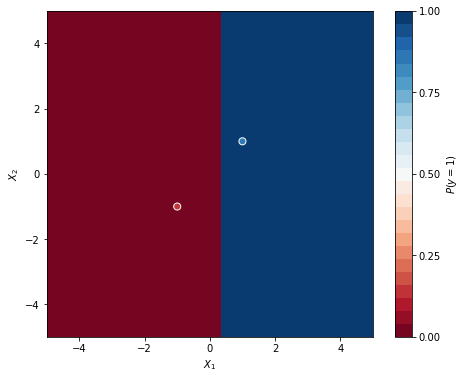

In [58]:
#visualize the Test set
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = Tree2.predict_proba(grid)[:, 1].reshape(xx.shape)

print(probs)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
 vmin=0, vmax=1)

ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.scatter(X_test[:, 0], X_test[:, 1],c = (y_test == 1 ), s=50,
 cmap="RdBu", vmin=-.2, vmax=1.2,
 edgecolor="white", linewidth=1)

ax.set(aspect="equal",
 xlim=(-5, 5), ylim=(-5, 5),
 xlabel="$X_1$", ylabel="$X_2$")

plt.show()

In [59]:
svc2= SVC(probability=True,random_state=0) 
#fit the model
svc2.fit(X_train, y_train)

SVC(probability=True, random_state=0)

In [61]:
SVCpredict1= svc2.predict(X_test)

In [62]:
#SVC training score
print(svc2.score(X_train,y_train))

1.0


In [63]:
#SVC test score
print(svc2.score(X_test,y_test))

1.0


In [64]:
confusionMatrixS2 = confusion_matrix(y_test,SVCpredict1)
confusionMatrixS2

array([[1, 0],
       [0, 1]])

[[0.44064376 0.44064376 0.44064376 ... 0.44064373 0.44064373 0.44064373]
 [0.44064376 0.44064376 0.44064376 ... 0.44064373 0.44064373 0.44064373]
 [0.44064376 0.44064376 0.44064376 ... 0.44064373 0.44064373 0.44064373]
 ...
 [0.44064373 0.44064373 0.44064373 ... 0.44064363 0.44064364 0.44064364]
 [0.44064373 0.44064373 0.44064373 ... 0.44064364 0.44064364 0.44064364]
 [0.44064373 0.44064373 0.44064373 ... 0.44064364 0.44064364 0.44064365]]


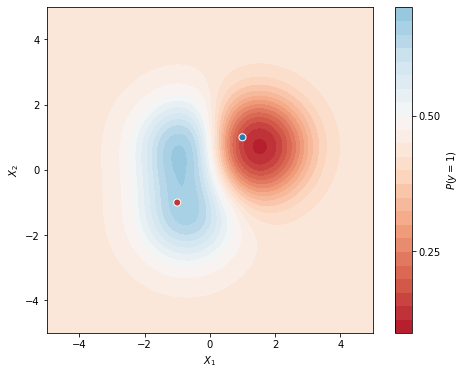

In [65]:
#visualize the Test set
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = svc2.predict_proba(grid)[:, 1].reshape(xx.shape)

print(probs)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
 vmin=0, vmax=1)

ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.scatter(X_test[:, 0], X_test[:, 1],c = (y_test == 1 ), s=50,
 cmap="RdBu", vmin=-.2, vmax=1.2,
 edgecolor="white", linewidth=1)

ax.set(aspect="equal",
 xlim=(-5, 5), ylim=(-5, 5),
 xlabel="$X_1$", ylabel="$X_2$")

plt.show()

In [66]:
# classify as features(Prefix_Suffix and URL_of_Anchor) and label with index 13
X = phishingData.iloc[0:13,[6,14]].values
y = phishingData.iloc[0:13,30].values

In [67]:
#split features and label into training and testing data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=4)

In [68]:
#perform feature scaling
scalar = StandardScaler()
X_train = scalar.fit_transform (X_train)
X_test = scalar.transform (X_test)

In [69]:
#Logistic Regression Classifier 
LRclassifier11 = LogisticRegression(C=100,random_state=0)
LRclassifier11.fit(X_train,y_train)
LRpredict11 = LRclassifier11.predict(X_test)

In [70]:
#LRC training score
LRclassifier11.score(X_train,y_train)

0.8888888888888888

In [71]:
#LRC test score
LRclassifier11.score(X_test,y_test)

1.0

In [72]:
#confusion matrix for printing count of misclassified samples in the test data prediction
LRconfusionMatrix11 = confusion_matrix(y_test,LRpredict11)

[[4.35180374e-07 4.39590919e-07 4.44046165e-07 ... 1.00132212e-02
  1.01136787e-02 1.02151336e-02]
 [4.41905577e-07 4.46384282e-07 4.50908379e-07 ... 1.01663907e-02
  1.02683689e-02 1.03713594e-02]
 [4.48734711e-07 4.53282629e-07 4.57876640e-07 ... 1.03218788e-02
  1.04254003e-02 1.05299489e-02]
 ...
 [6.55234823e-01 6.57509234e-01 6.59776432e-01 ... 9.99977362e-01
  9.99977589e-01 9.99977814e-01]
 [6.58690882e-01 6.60954291e-01 6.63210365e-01 ... 9.99977706e-01
  9.99977930e-01 9.99978151e-01]
 [6.62130161e-01 6.64382383e-01 6.66627151e-01 ... 9.99978046e-01
  9.99978266e-01 9.99978484e-01]]


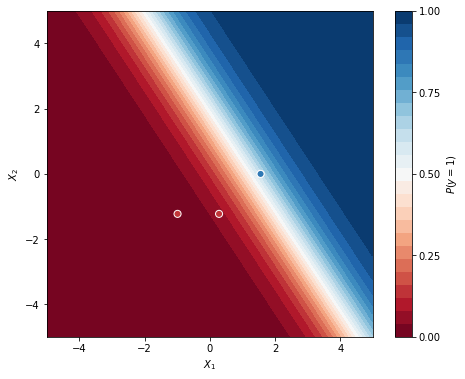

In [73]:
#visualize the Test set 
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = LRclassifier11.predict_proba(grid)[:, 1].reshape(xx.shape)

print(probs)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
 vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_test[:, 0], X_test[:, 1],c = (y_test == 1 ), s=50,
 cmap="RdBu", vmin=-.2, vmax=1.2,
 edgecolor="white", linewidth=1)

ax.set(aspect="equal",
 xlim=(-5, 5), ylim=(-5, 5),
 xlabel="$X_1$", ylabel="$X_2$")

plt.show()

In [74]:
#RFC
RFclassifier11 = RandomForestClassifier(random_state=0)
RFclassifier11.fit(X_train,y_train)
RFpredict11 = RFclassifier11.predict(X_test)

In [75]:
#RFC training score
RFclassifier11.score(X_train,y_train)

1.0

In [76]:
#RFC test score
RFclassifier11.score(X_test,y_test)

1.0

In [77]:
#confusion matrix for printing count of misclassified samples in the test data prediction
RFconfusionMatrix11 = confusion_matrix(y_test,RFpredict11)

[[0.   0.   0.   ... 0.04 0.04 0.04]
 [0.   0.   0.   ... 0.04 0.04 0.04]
 [0.   0.   0.   ... 0.04 0.04 0.04]
 ...
 [0.09 0.09 0.09 ... 0.68 0.68 0.68]
 [0.09 0.09 0.09 ... 0.68 0.68 0.68]
 [0.09 0.09 0.09 ... 0.68 0.68 0.68]]


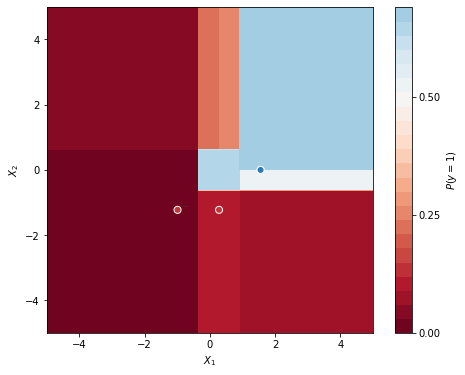

In [78]:
#visualize the Test set 
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = RFclassifier11.predict_proba(grid)[:, 1].reshape(xx.shape)

print(probs)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
 vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_test[:, 0], X_test[:, 1],c = (y_test == 1 ), s=50,
 cmap="RdBu", vmin=-.2, vmax=1.2,
 edgecolor="white", linewidth=1)

ax.set(aspect="equal",
 xlim=(-5, 5), ylim=(-5, 5),
 xlabel="$X_1$", ylabel="$X_2$")

plt.show()

In [79]:
#XGBoost
xgb11 = XGBClassifier(random_state=0)
xgb11.fit(X_train,y_train)
xgbpredict11 = xgb11.predict(X_test)

In [80]:
xgb11.score(X_train,y_train)

0.7777777777777778

In [81]:
xgb11.score(X_test,y_test)

0.5

In [82]:
confusionMatrixXg2 = confusion_matrix(y_test,xgbpredict11)
confusionMatrixXg2

array([[2, 0],
       [2, 0]])

[[0.21519382 0.21519382 0.21519382 ... 0.21519382 0.21519382 0.21519382]
 [0.21519382 0.21519382 0.21519382 ... 0.21519382 0.21519382 0.21519382]
 [0.21519382 0.21519382 0.21519382 ... 0.21519382 0.21519382 0.21519382]
 ...
 [0.22861996 0.22861996 0.22861996 ... 0.22861996 0.22861996 0.22861996]
 [0.22861996 0.22861996 0.22861996 ... 0.22861996 0.22861996 0.22861996]
 [0.22861996 0.22861996 0.22861996 ... 0.22861996 0.22861996 0.22861996]]


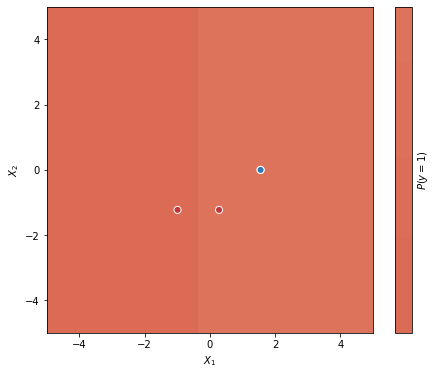

In [83]:
#visualize the Test set 
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = xgb11.predict_proba(grid)[:, 1].reshape(xx.shape)

print(probs)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
 vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_test[:, 0], X_test[:, 1],c = (y_test == 1 ), s=50,
 cmap="RdBu", vmin=-.2, vmax=1.2,
 edgecolor="white", linewidth=1)

ax.set(aspect="equal",
 xlim=(-5, 5), ylim=(-5, 5),
 xlabel="$X_1$", ylabel="$X_2$")

plt.show()

In [84]:
Tree11 = DecisionTreeClassifier(random_state=0)
# fit the model 
Tree11.fit(X_train, y_train)
DTCpredict11= Tree11.predict(X_test)

In [85]:
#DTC training score
print(Tree11.score(X_train,y_train))

1.0


In [86]:
#Tree test score
print(Tree11.score(X_test,y_test))

1.0


In [87]:
confusionMatrixD11 = confusion_matrix(y_test,DTCpredict11)
confusionMatrixD11

array([[2, 0],
       [0, 2]])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]


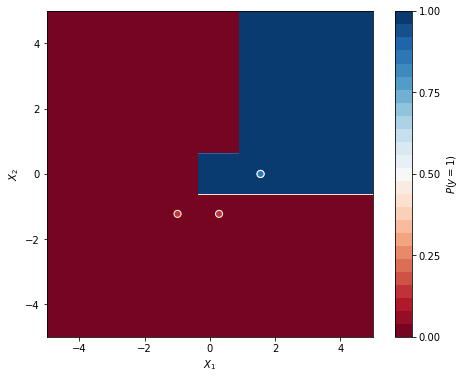

In [88]:
#visualize the Test set
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = Tree11.predict_proba(grid)[:, 1].reshape(xx.shape)

print(probs)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
 vmin=0, vmax=1)

ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.scatter(X_test[:, 0], X_test[:, 1],c = (y_test == 1 ), s=50,
 cmap="RdBu", vmin=-.2, vmax=1.2,
 edgecolor="white", linewidth=1)

ax.set(aspect="equal",
 xlim=(-5, 5), ylim=(-5, 5),
 xlabel="$X_1$", ylabel="$X_2$")

plt.show()

In [89]:
svc11= SVC(probability=True,random_state=0) 
#fit the model
svc11.fit(X_train, y_train)
SVCpredict11= svc11.predict(X_test)

In [90]:
SVCpredict11= svc11.predict(X_test)

In [91]:
#SVC training score
print(svc11.score(X_train,y_train))

0.7777777777777778


In [92]:
#SVC test score
print(svc11.score(X_test,y_test))

0.5


In [93]:
confusionMatrixS11 = confusion_matrix(y_test,SVCpredict11)
confusionMatrixS11

array([[2, 0],
       [2, 0]])

[[0.23993011 0.23993011 0.23993011 ... 0.23993011 0.23993011 0.23993011]
 [0.23993011 0.23993011 0.23993011 ... 0.23993011 0.23993011 0.23993011]
 [0.23993011 0.23993011 0.23993011 ... 0.23993011 0.23993011 0.23993011]
 ...
 [0.23993023 0.23993024 0.23993024 ... 0.23992943 0.23992945 0.23992947]
 [0.23993023 0.23993023 0.23993024 ... 0.23992945 0.23992947 0.2399295 ]
 [0.23993022 0.23993023 0.23993023 ... 0.23992947 0.23992949 0.23992952]]


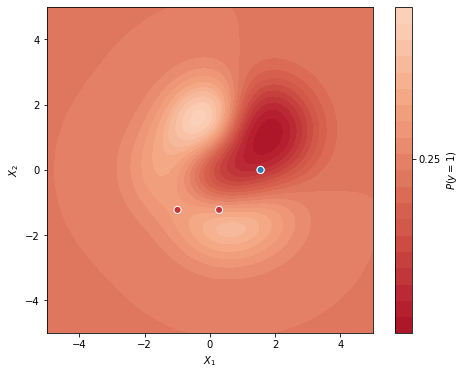

In [94]:
#visualize the Test set
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = svc11.predict_proba(grid)[:, 1].reshape(xx.shape)

print(probs)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
 vmin=0, vmax=1)

ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.scatter(X_test[:, 0], X_test[:, 1],c = (y_test == 1 ), s=50,
 cmap="RdBu", vmin=-.2, vmax=1.2,
 edgecolor="white", linewidth=1)

ax.set(aspect="equal",
 xlim=(-5, 5), ylim=(-5, 5),
 xlabel="$X_1$", ylabel="$X_2$")

plt.show()